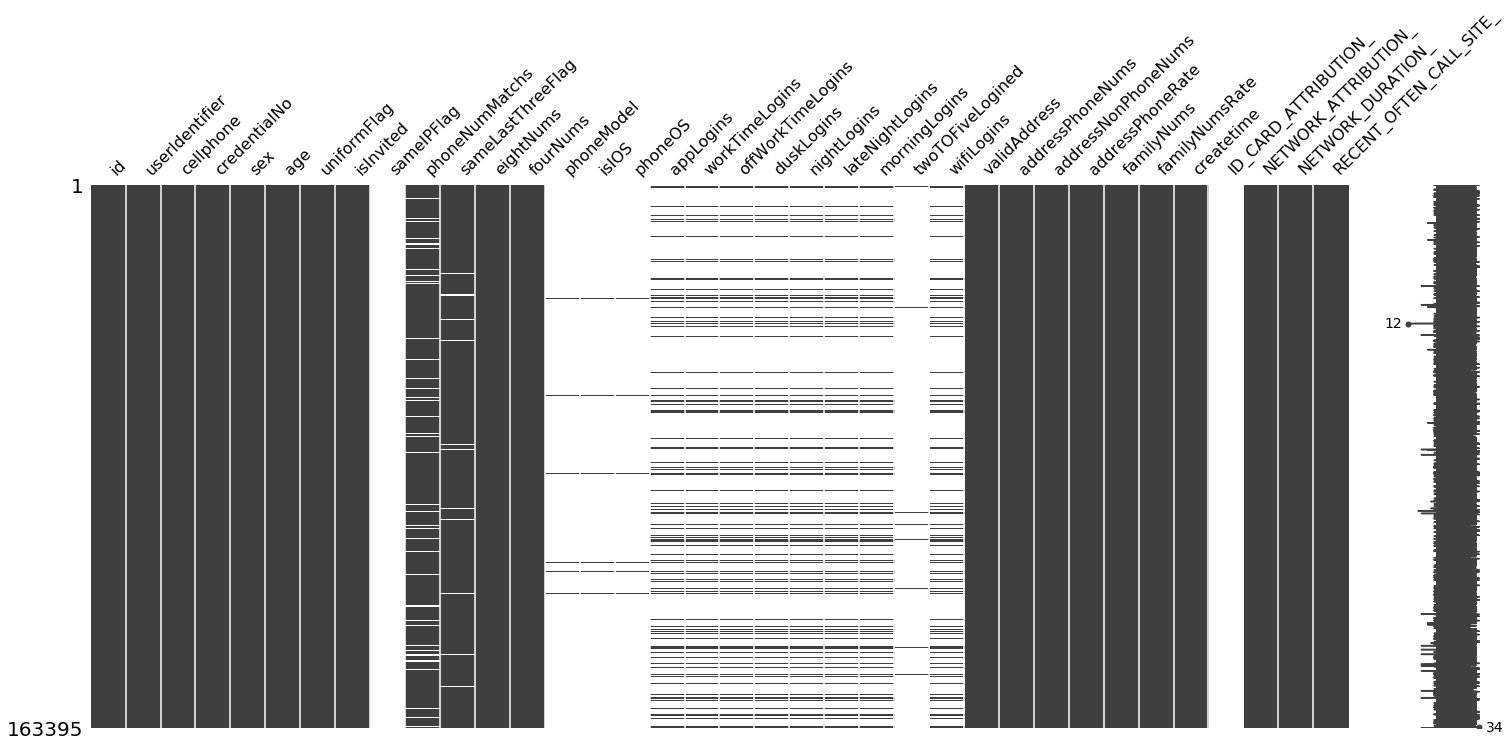

USER_IDENTIFIER_          163385
AVG(DIALING)              163385
AVG(DIALED)               163385
AVG(DIALING_COUNT_)       163385
DIALED_COUNT_             163385
avg_zhujiao               163384
avg_beijiao               163333
avg(TELEPHONE_CHARGE_)    163385
avg(SMS_COUNT_)           163385
yuqi                      163395
first_leadtime            163395
dtype: int64

In [1]:
import pandas as pd
operator_data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
import missingno as missingno
missingno.matrix(extention)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()

In [2]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M:%S").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

F:\anoconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [3]:
#两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

F:\anoconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


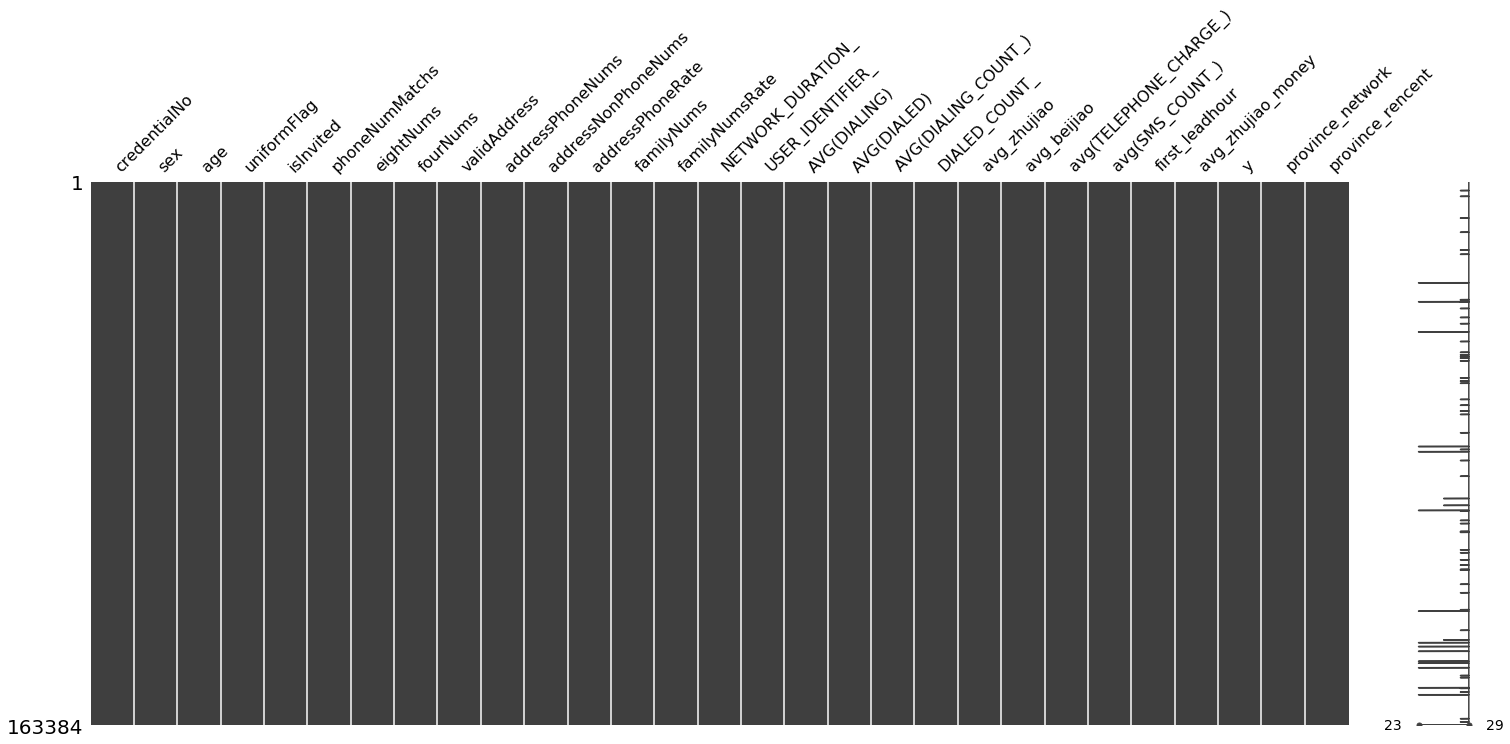

,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,validAddress,addressPhoneNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,49.0,48.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,32.0,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,138.0,111.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,160.0,147.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,909.0,826.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,218.0,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,145.0,128.0,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,117.0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,75.0,72.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,129.0,128.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


In [4]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
first_data2

In [5]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2 =first_data2.dropna(axis=0)


F:\anoconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anoconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
zhima=pd.read_csv("C:\\Users\\Administrator\\Desktop\\testingData\\zhima.csv",sep=",",encoding="gbk")
zhima=zhima[["USER_IDENTIFIER_","zhima"]]
final_data = zhima.merge(first_data2,on="USER_IDENTIFIER_")
# print(final_data.info())
final_data.columns
final_data

,USER_IDENTIFIER_,zhima,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,eightNums,fourNums,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
0,0000e3063e144e0b97540094f4153ae9,663,4.41E+17,1.0,27.0,0.0,1.0,17.0,1,0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
1,0001bdae47964e549cd3fb61895f4ae1,604,3.21E+17,0.0,29.0,0.0,0.0,6.0,0,1,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
2,0002471215eb41fa861d0570cc32f282,673,4.42E+17,1.0,38.0,0.0,0.0,8.0,1,1,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
3,00029b83ca5842eaac53312b35c2f6b4,625,1.30E+17,0.0,24.0,1.0,0.0,16.0,1,0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
4,0002aaa4191141fc89426e98c04efe7e,606,4.33E+17,0.0,38.0,0.0,1.0,23.0,1,0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
5,0002bb0ae76d461cbc33309241114637,611,4.41E+17,1.0,28.0,1.0,1.0,6.0,0,1,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
6,0002e692546347139c59469730b3f2b7,669,43312219890116601X,0.0,28.0,0.0,1.0,17.0,0,2,...,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
7,0002f88cd9f6448882f2cd3d6a26bc3c,738,23011919780824018X,1.0,39.0,0.0,0.0,12.0,2,0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
8,0003029afb0f485ab5dedbc42a43f872,661,1.53E+17,1.0,28.0,0.0,1.0,15.0,2,2,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
9,00030baeb0324793b5f332d01db439a5,676,2.11E+17,0.0,23.0,1.0,1.0,13.0,2,1,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


## 以上都是数据处理部分，以下开始模型搭建
### 到这里 你如果是个初学者 就开始迷茫了。为什么要分组求IV值讲解（http://blog.csdn.net/kevin7658/article/details/50780391）

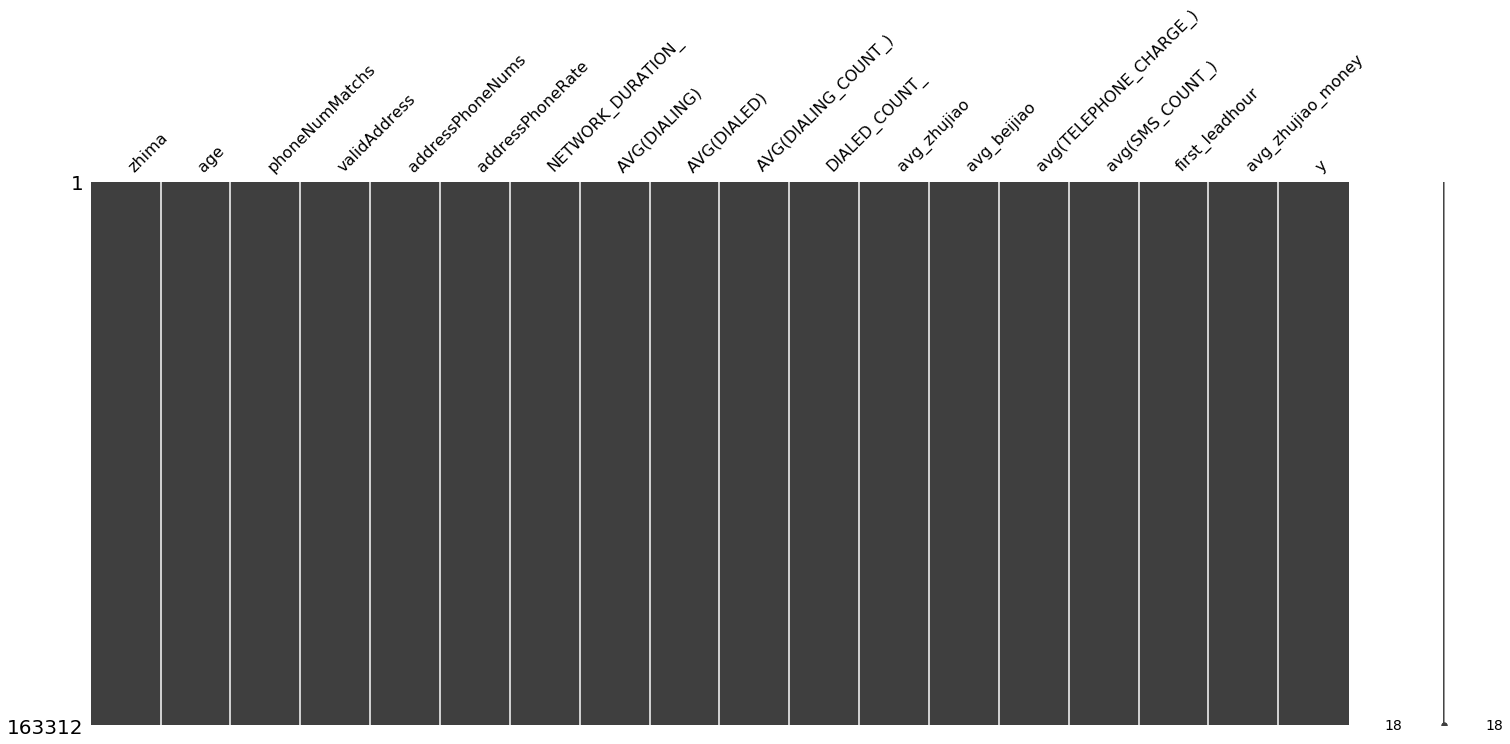

,zhima,age,phoneNumMatchs,validAddress,addressPhoneNums,addressPhoneRate,NETWORK_DURATION_,AVG(DIALING),AVG(DIALED),AVG(DIALING_COUNT_),DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y
0,663,27.0,17.0,49.0,48.0,97.96,44.0,16802.000000,17394.875000,151.8750,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0
1,604,29.0,6.0,32.0,32.0,100.00,14.0,5692.300000,1176.400000,26.5000,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0
2,673,38.0,8.0,138.0,111.0,80.43,95.0,12072.250000,47105.000000,54.5000,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0
3,625,24.0,16.0,160.0,147.0,91.88,31.0,2615.400000,4094.300000,54.7000,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0
4,606,38.0,23.0,909.0,826.0,90.87,82.0,32724.400000,25979.300000,466.0000,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0
5,611,28.0,6.0,218.0,218.0,100.00,119.0,17869.555556,29157.555556,190.5556,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0
6,669,28.0,17.0,145.0,128.0,88.28,49.0,29895.000000,23094.125000,143.3750,261.0,208.509154,116.123821,90243.50000,96.8750,15,3.018682,0
7,738,39.0,12.0,117.0,117.0,100.00,80.0,18962.300000,10149.800000,173.1000,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0
8,661,28.0,15.0,75.0,72.0,96.00,100.0,18848.250000,21270.625000,177.5000,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0
9,676,23.0,13.0,129.0,128.0,99.22,10.0,14044.750000,7891.250000,130.2500,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0


In [7]:
plot_data = final_data.drop(["USER_IDENTIFIER_","credentialNo","sex","uniformFlag","isInvited","eightNums","fourNums","addressNonPhoneNums","familyNums","familyNumsRate","province_network","province_rencent"],axis=1)
plot_data["zhima"]
missingno.matrix(plot_data)
plot_data

In [130]:
class getIVandKS(object):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    def __init__(self):
        self.result = []
        self.IV = []
        self.KS = []
        self.KSPy1 =[]
        self.KSPy0 =[]
    def fit(self,x,y):
        x = x.dropna()
        tabel = pd.crosstab(x,y)
        py1 = []
        py0 = []
        for i in list(range(len(tabel))):
            py1 = py1+[tabel.iloc[i,1]/sum(tabel[1])]
            py0 = py0+[tabel.iloc[i,0]/sum(tabel[0])]
        py1 = pd.Series(py1,index = tabel.index)
        py0 = pd.Series(py0,index = tabel.index)
        woe = np.log(py1/py0)
        IV = (py1-py0)*woe
        result = pd.concat([tabel,py1,py0,woe,IV],axis=1)
        result.columns = ["0","1","py1","py0","woe","IV"]
        self.result = result
        self.IV = sum(result["IV"])
        
    def getKS(self):
        tableKS = self.result
        cum_py1 = pd.Series(np.zeros(len(tableKS)))
        cum_py0 = pd.Series(np.zeros(len(tableKS)))
        for i in list(range(len(tableKS))):
            if i==0:
                cum_py1[i] = tableKS['py1'][[i]]
                cum_py0[i] = tableKS['py0'][[i]]
            else:
                cum_py1[i] = cum_py1[i-1] + tableKS['py1'][[i]]
                cum_py0[i] = cum_py0[i-1] + tableKS['py0'][[i]]
        ks = pd.Series(np.abs(cum_py1-cum_py1))
        ks.index = tableKS.index
        cum_py1.index =tableKS.index
        cum_py0.index =tableKS.index
        self.KS = pd.concat([tableKS,ks,cum_py1,cum_py0],axis=1)
        self.KS.columns=list(tableKS.columns)+["KS","cum_py1","cum_py0"]
        self.KSPy1 =cum_py1
        self.KSPy0 =cum_py0
        print(self.KS)
    
    def plot_woe(self):
        tabel = self.result
        n=len(tabel.index)
        plt.bar(list(range(n)),np.array(tabel['woe']),width=0.8,facecolor="#9999ff",edgecolor="white")
        plt.xticks(list(range(n)),tabel.index,rotation=90)
        


## 寻找好的分组

In [9]:
######cut 有个属性duplicates ='drop' 就是有不平衡情况 删除这个
IV=[]
for i in plot_data.drop(['y'],axis=1).columns:
    IV_i=[]
    print("10000000000000000000000000"+i)
    for j in range(1,12):
        X = pd.qcut(plot_data[i],j,duplicates ='drop')
#         print(X)
#         print(plot_data[i])
        fun =getIVandKS()
        fun.fit(X,plot_data['y'])
        print(fun.IV)
        IV_i += [fun.IV]
    IV += [max(IV_i)]
print(IV,)

10000000000000000000000000zhima
0.0
0.259993347074
0.354997222168
0.407163111813
0.455813810279
0.500578525712
0.541514579113
0.563578930324
0.586446991629
0.614470590274
0.641263960369
10000000000000000000000000age
0.0
0.000996158140746
0.000711966636429
0.00144219376513
0.000982040846191
0.00153099664985
0.00126373997073
0.0014719768655
0.00148387171439
0.00149921077112
0.00169202680867
10000000000000000000000000phoneNumMatchs
0.0
0.00271418052423
0.015955429483
0.0248558077446
0.0351768117985
0.0449137855807
0.0352913935163
0.0454536371203
0.0354838330966
0.224700306867
0.0357747231132
10000000000000000000000000validAddress
0.0
0.0205966711013
0.0238143242798
0.0248268308809
0.0261827141066
0.0272371702629
0.027464108618
0.0275360636356
0.0274649750135
0.0281668681714
0.0285279336256
10000000000000000000000000addressPhoneNums
0.0
0.0206695240277
0.0249018906756
0.0264634680057
0.0279669217168
0.0284710996726
0.0303860062582
0.0298271799235
0.0294775925011
0.0301204881471
0.030925401

In [10]:
params = plot_data.drop(['y'],axis=1).columns
woeTable = pd.concat([pd.Series(IV),pd.Series(params)],axis=1)
woeDataFrame = pd.DataFrame(woeTable)
woeDataFrame.columns=([ 'IV','params'])
woeDataFrame.sort_index(by='IV',ascending=False)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


,IV,params
0,0.641264,zhima
2,0.224700,phoneNumMatchs
6,0.049570,NETWORK_DURATION_
4,0.030925,addressPhoneNums
3,0.028528,validAddress
12,0.020175,avg_beijiao
5,0.018830,addressPhoneRate
13,0.017765,avg(TELEPHONE_CHARGE_)
14,0.011255,avg(SMS_COUNT_)
16,0.009711,avg_zhujiao_money


In [11]:
plot_data2 = final_data[["sex","uniformFlag","isInvited","eightNums","fourNums","addressNonPhoneNums","familyNums","familyNumsRate","y",]]
IV=[]
for i in plot_data2.drop(['y'],axis=1).columns:
    IV_i=[]
    print("10000000000000000000000000"+i)
    for j in range(1,12):
        X = pd.qcut(plot_data2[i],j,duplicates ='drop')
#         print(X)
#         print(plot_data[i])
        fun =getIVandKS()
        fun.fit(X,plot_data['y'])
        print(fun.IV)
        IV_i += [fun.IV]
    IV += [max(IV_i)]
print(IV)

10000000000000000000000000sex
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000uniformFlag
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000isInvited
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000eightNums
0.0
5.18194884014e-08
5.18194884014e-08
5.18194884014e-08
0.000109784978582
0.000109784978582
0.000109784978582
0.000109784978582
0.000109784978582
0.000109784978582
0.000109784978582
10000000000000000000000000fourNums
0.0
0.0
0.000185736171877
0.000185736171877
0.000185736171877
0.000185736171877
0.000185736171877
0.000185736171877
0.000795103985544
0.000795103985544
0.000795103985544
10000000000000000000000000addressNonPhoneNums
0.0
1.0694601939e-05
0.00127900193781
0.00182959785026
0.00200525051036
0.00225405405134
0.00231180844173
0.00256089871092
0.00252260922154
0.00253363181345
0.00260132976645
10000000000000000000000000familyNums
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10000000000000000000000000familyNumsRa

In [12]:
params2 = plot_data2.drop(['y'],axis=1).columns
woeTable2 = pd.concat([pd.Series(IV),pd.Series(params2)],axis=1)
woeDataFrame2 = pd.DataFrame(woeTable2)
woeDataFrame2.columns=([ 'IV','params'])
woeDataFrame2.sort_index(by='IV',ascending=False)

F:\anoconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


,IV,params
5,0.002601,addressNonPhoneNums
4,0.000795,fourNums
3,0.000110,eightNums
0,0.000000,sex
1,0.000000,uniformFlag
2,0.000000,isInvited
6,0.000000,familyNums
7,0.000000,familyNumsRate


In [13]:
n=6
woeGetData =final_data[["sex","avg_beijiao","avg(TELEPHONE_CHARGE_)","age","avg_zhujiao_money","phoneNumMatchs","addressPhoneNums","validAddress","NETWORK_DURATION_","zhima","addressPhoneRate","avg(SMS_COUNT_)","y"]]
print(woeGetData)
Xsplit=pd.qcut(woeGetData.iloc[:,5],10,duplicates ='drop')
fun =getIVandKS()
fun.fit(Xsplit,plot_data['y'])
fun.result


        sex  avg_beijiao  avg(TELEPHONE_CHARGE_)   age  avg_zhujiao_money  \
0       1.0   140.281250             17207.87500  27.0           1.024156   
1       0.0   152.779221             10708.10000  29.0           1.881155   
2       1.0   355.845137             13429.37500  38.0           1.112417   
3       0.0    44.600218              4281.10000  24.0           1.636882   
4       0.0    62.995393             14251.70000  38.0           0.435507   
5       1.0   131.209000             13987.00000  28.0           0.782728   
6       0.0   116.123821             90243.50000  28.0           3.018682   
7       1.0    91.770344             16961.80000  39.0           0.894501   
8       1.0   103.192844             14347.37500  28.0           0.761205   
9       0.0    79.911392             35057.62500  23.0           2.496137   
10      1.0    62.245810             12285.00000  24.0           1.244984   
11      0.0    49.186681             15222.25000  33.0           1.887943   

,0,1,py1,py0,woe,IV
phoneNumMatchs,,,,,,
"(2.999, 7.0]",15392,1778,0.114157,0.104185,0.091408,0.000912
"(7.0, 9.0]",18456,2251,0.144526,0.124925,0.145752,0.002857
"(9.0, 10.0]",11138,1289,0.082761,0.075391,0.093271,0.000687
"(10.0, 12.0]",24278,2698,0.173226,0.164333,0.052707,0.000469
"(12.0, 12.612]",11153,57,0.003660,0.075492,-3.026646,0.217412
"(12.612, 13.0]",12268,1461,0.093804,0.083039,0.121893,0.001312
"(13.0, 14.0]",11879,1271,0.081605,0.080406,0.014798,0.000018
"(14.0, 16.0]",20277,2189,0.140546,0.137251,0.023724,0.000078
"(16.0, 18.0]",13360,1457,0.093547,0.090431,0.033881,0.000106


### 考虑到phoneNumMatchs(12.0, 12.612]	这个分组出现和其他数据很大的反差现象，并且该变量从合理性常规性分析不应该如此，决定重新划分组人工分组（12，13]这一组。

### 下面来考虑对每个特征的IV最大化时候的woe分组样本的信息量的变化  如果变化呈现反复波动 则分组不合理

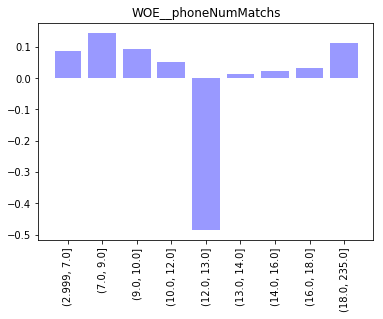

In [16]:
import matplotlib.pyplot as plt
binsphoneNumMatchs = [2.999,7.0,9.0,10.0,12.0,13.0,14.0,16.0,18.0,235.0]
phoneNumMatchsCut=pd.cut(woeGetData.iloc[:,5],binsphoneNumMatchs)
fun =getIVandKS()
fun.fit(phoneNumMatchsCut,plot_data['y'])
fun.result.sum()
fun.plot_woe()
plt.title("WOE__phoneNumMatchs")
plt.show()

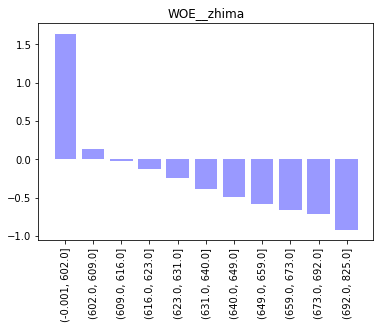

In [17]:
cutN = 11
cutQ = pd.qcut(final_data["zhima"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__zhima")
plt.show()

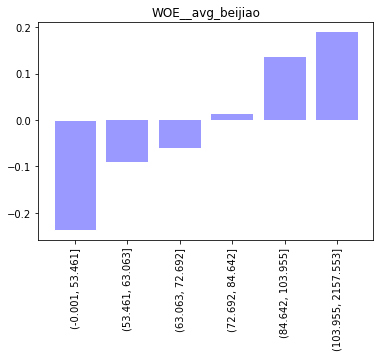

In [18]:
cutN = 6
cutQ = pd.qcut(final_data["avg_beijiao"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__avg_beijiao")
plt.show()

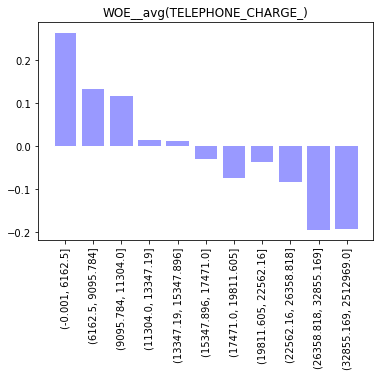

In [19]:
cutN = 11
cutQ = pd.qcut(final_data["avg(TELEPHONE_CHARGE_)"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__avg(TELEPHONE_CHARGE_)")
plt.show()

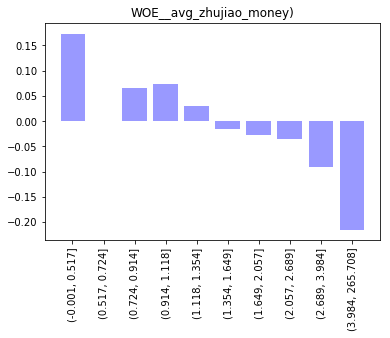

In [20]:
cutN = 10
cutQ = pd.qcut(final_data["avg_zhujiao_money"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__avg_zhujiao_money)")
plt.show()

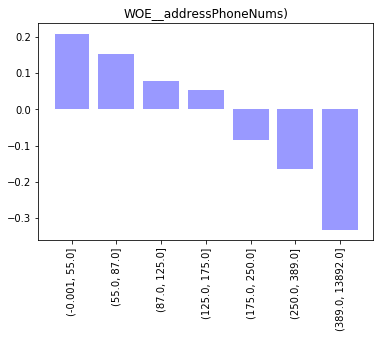

In [21]:
cutN = 7
cutQ = pd.qcut(final_data["addressPhoneNums"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__addressPhoneNums)")
plt.show()

### 统计学来说，分组平均分组样本不少于5%，那么按照等频分组来说，就是20个分组，已经属于最大化了validAddress，这个变量单调增加，为是的信息量最大化，取20个分组

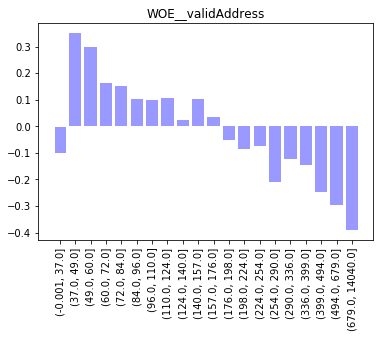

0.035162565152733263

In [22]:
cutN = 20
cutQ = pd.qcut(final_data["validAddress"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__validAddress")
plt.show()
sum(fun.result['IV'])

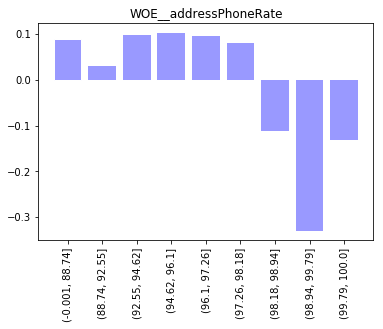

0.01882960661469427

In [23]:
cutN = 9
cutQ = pd.qcut(final_data["addressPhoneRate"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__addressPhoneRate")
plt.show()
sum(fun.result['IV'])

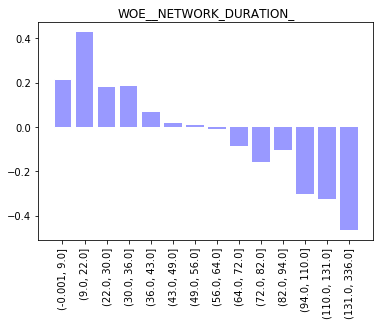

0.053177176387256962

In [24]:
cutN = 14
cutQ = pd.qcut(final_data["NETWORK_DURATION_"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__NETWORK_DURATION_")
plt.show()
sum(fun.result['IV'])

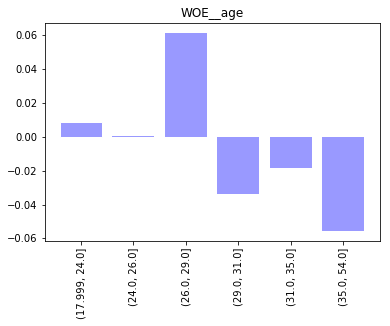

0.0015309966498497326

In [25]:
cutN = 6
cutQ = pd.qcut(final_data["age"],cutN,duplicates ='drop')
fun =getIVandKS()
fun.fit(cutQ,plot_data['y'])
fun.plot_woe()
plt.title("WOE__age")
plt.show()
sum(fun.result['IV'])

### 以上特征为woe跑出来的特征，再加上性别，年龄，地址，暂定是十一个有效特征变量
### WOE替换

In [26]:
woeSplit_Data = final_data[["sex","avg_beijiao","avg(TELEPHONE_CHARGE_)","age","avg_zhujiao_money","phoneNumMatchs","addressPhoneNums","validAddress","NETWORK_DURATION_","zhima","addressPhoneRate","y"]]
woeSplit_Data.columns=["sex","avg_beijiao","avg_TELEPHONE_CHARGE_","age","avg_zhujiao_money","phoneNumMatchs","addressPhoneNums","validAddress","NETWORK_DURATION_","zhima","addressPhoneRate","y"]
woeSplit_Data_Copy = woeSplit_Data.copy()
cuts_n=[6,11,6,10,7,20,14,11,9]
n=0
adict=globals()
binsphoneNumMatchs = [2.999,7.0,9.0,10.0,12.0,13.0,14.0,16.0,18.0,235.0]
for i in woeSplit_Data.drop(["sex","y","phoneNumMatchs"],axis=1).columns:
    woeSplit_Data_Copy[i]=pd.qcut(woeSplit_Data[i],cuts_n[n],duplicates ='drop')
    n+=1
woeSplit_Data_Copy["phoneNumMatchs"]=pd.cut(woeSplit_Data["phoneNumMatchs"],binsphoneNumMatchs)
for i in woeSplit_Data_Copy.drop(["y","sex"],axis=1).columns:
    funQ = getIVandKS()
    funQ.fit(woeSplit_Data_Copy[i],woeSplit_Data_Copy["y"])
    adict["woe%s" %i] = dict(zip(funQ.result.index,funQ.result["woe"]))
    woeSplit_Data_Copy[i]=woeSplit_Data_Copy[i].map(lambda x:adict["woe%s" % i][x])
#     print(adict["woe%s" %i],"11111111111111111111111111111111111111111111111",i)
# woeSplit_Data_Copy[""]

### 下面来跑LR模型

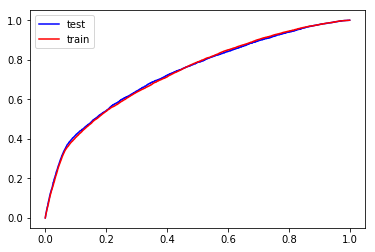

0.7335684019004699

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,auc,roc_curve
x_train,x_test,y_train,y_test=train_test_split(woeSplit_Data_Copy.drop(["y"],axis=1),woeSplit_Data_Copy["y"],test_size=0.3)
LR_1=LogisticRegression(penalty="l2",dual=False,tol=1e-4,C=1,class_weight="balanced")
LR_1.fit(x_train,y_train)
# np.isnan(final_data).any()
#保存所建立的LR模型
from sklearn.externals import joblib
joblib.dump(LR_1, 'lr_1.model')
LR=joblib.load("lr_1.model")
fpr,tpr,threhold=roc_curve(y_test,LR_1.predict_proba(x_test)[:,1])
fpr1,tpr1,threhold1=roc_curve(y_train,LR_1.predict_proba(x_train)[:,1])
from matplotlib import pyplot as plt
plt.plot(fpr,tpr,color="blue")
plt.plot(fpr1,tpr1,color="red")
plt.legend(["test","train"])
plt.show()
auc(fpr,tpr)

In [29]:
from sklearn import metrics
expected = y_train
predicted = LR_1.predict(x_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.95      0.75      0.84    103396
          1       0.20      0.59      0.30     10922

avg / total       0.87      0.74      0.79    114318

[[77603 25793]
 [ 4466  6456]]


### 制作评分卡

In [33]:
A=600
B=9.55386
woeData_2 = woeSplit_Data_Copy.copy()
woePredict1 = woeData_2.drop((['y','score']),axis=1)
p = LR_1.predict_proba(woePredict1)[:,1]
# p.sort()
woeSplit_Data_Copy['score'] = A+B*np.log(p/(1-p))
woeSplit_Data_Copy

,sex,avg_beijiao,avg_TELEPHONE_CHARGE_,age,avg_zhujiao_money,phoneNumMatchs,addressPhoneNums,validAddress,NETWORK_DURATION_,zhima,addressPhoneRate,y,score
0,1.0,0.189036,-0.031592,0.061415,0.072722,0.033881,0.211250,0.351814,0.018217,-0.663338,0.081951,0,594.825329
1,0.0,0.189036,0.116082,0.061415,-0.026893,0.091408,0.211250,-0.101079,0.426706,0.132063,-0.131396,0,606.721822
2,1.0,0.189036,0.010918,-0.055434,0.072722,0.145752,0.077371,0.022064,-0.302038,-0.663338,0.089278,0,591.059167
3,0.0,-0.236574,0.264486,0.008729,-0.015341,0.023724,0.053450,0.034707,0.183865,-0.246090,0.030123,0,599.884359
4,0.0,-0.090952,0.010918,-0.055434,0.175481,0.111586,-0.334138,-0.391529,-0.158137,0.132063,0.030123,0,599.503935
5,1.0,0.189036,0.010918,0.061415,0.066009,0.091408,-0.085999,-0.083706,-0.325162,-0.017462,-0.131396,0,595.891922
6,0.0,0.189036,-0.193276,0.061415,-0.090161,0.033881,0.053450,0.102722,0.018217,-0.663338,0.089278,0,597.224977
7,1.0,0.136698,-0.031592,-0.055434,0.066009,0.052707,0.077371,0.106422,-0.158137,-0.925950,-0.131396,0,587.214901
8,1.0,0.136698,0.010918,0.061415,0.066009,0.023724,0.151469,0.149959,-0.302038,-0.663338,0.103049,0,591.318420
9,0.0,0.012345,-0.193276,0.008729,-0.035629,-0.486473,0.053450,0.022064,0.426706,-0.707409,-0.329387,0,589.055987


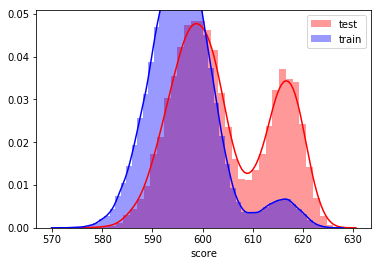

In [72]:
import seaborn 
seaborn.distplot(woeSplit_Data_Copy["score"][woeSplit_Data_Copy["y"]==1],color="red")
seaborn.distplot(woeSplit_Data_Copy["score"][woeSplit_Data_Copy["y"]==0],color="blue")
plt.legend(["test","train"])
plt.show()

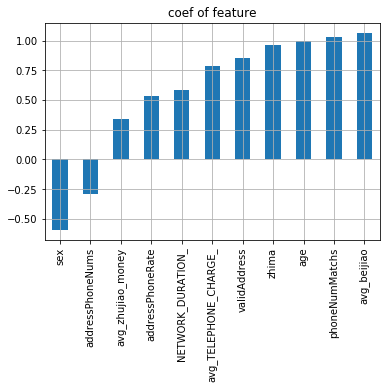

In [71]:
#pandas 绘图 只需要一个series就可以了
coef=pd.Series(LR_1.coef_[0],index=woeSplit_Data_Copy.drop(["y","score"],axis=1).columns).sort_values()
coef.plot(kind="bar",grid=True,title ='coef of feature')
plt.show()

#### 计算KS值

In [169]:
funT =getIVandKS()
# bins=[560,570,575.580,585,590,595,600,605,610,615,620,625,630,640]
bins2 = range(560,640,3)
print(bins2)
dengkuan_cut = pd.cut(woeSplit_Data_Copy['score'],bins2)
funT.fit(dengkuan_cut,woeSplit_Data_Copy["y"])
funT.getKS()

range(560, 640, 3)
                0     1       py1       py0       woe        IV   KS  \
score                                                                  
(560, 563]      0     0  0.000000  0.000000       NaN       NaN  0.0   
(563, 566]      0     0  0.000000  0.000000       NaN       NaN  0.0   
(566, 569]      0     0  0.000000  0.000000       NaN       NaN  0.0   
(569, 572]      1     0  0.000000  0.000007      -inf       inf  0.0   
(572, 575]     22     0  0.000000  0.000149      -inf       inf  0.0   
(575, 578]    143     2  0.000128  0.000968 -2.019931  0.001696  0.0   
(578, 581]    737     7  0.000449  0.004989 -2.406911  0.010925  0.0   
(581, 584]   2541    33  0.002119  0.017199 -2.094039  0.031580  0.0   
(584, 587]   6837   166  0.010658  0.046278 -1.468350  0.052303  0.0   
(587, 590]  13860   448  0.028764  0.093815 -1.182202  0.076904  0.0   
(590, 593]  22341  1018  0.065361  0.151221 -0.838817  0.072021  0.0   
(593, 596]  28463  1710  0.109791  0.192660 -

F:\anoconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


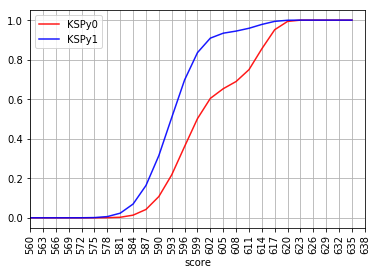

In [171]:
funT.KSPy1.plot(kind="line",color='red',grid =True,alpha=0.9)
funT.KSPy0.plot(kind="line",color='blue',grid =True,alpha=0.9)
plt.xticks(list(range(len(bins2))),bins2,rotation=90)
plt.legend(["KSPy0","KSPy1"])
plt.show()

In [172]:
maxKsPart = funT.KSPy0 -funT.KSPy1
maxKsPart.sort_values(ascending =False)

score
(596, 599]    3.364788e-01
(599, 602]    3.338677e-01
(602, 605]    3.047391e-01
(593, 596]    2.900153e-01
(605, 608]    2.808589e-01
(608, 611]    2.550274e-01
(611, 614]    2.093246e-01
(590, 593]    2.071467e-01
(614, 617]    1.230859e-01
(587, 590]    1.212865e-01
(584, 587]    5.623514e-02
(617, 620]    4.207881e-02
(581, 584]    2.061507e-02
(620, 623]    5.801104e-03
(578, 581]    5.534364e-03
(575, 578]    9.952074e-04
(572, 575]    1.556821e-04
(623, 626]    5.743667e-05
(569, 572]    6.768785e-06
(635, 638]    2.220446e-16
(632, 635]    2.220446e-16
(626, 629]    2.220446e-16
(629, 632]    2.220446e-16
(566, 569]    0.000000e+00
(563, 566]    0.000000e+00
(560, 563]    0.000000e+00
dtype: float64

## 下面这段代码和以上以下都无关，插播一个例子，用于对IV和woe不懂的人看，这是一个求woe值和IV值得过程，主要对一组X值和一组Y值整合求IV，最终求IV的和 来判定这个特征对Y的作用到底有多大。IV的和大于0.2为比较有明显作用。

In [ ]:
from pandas import Series,DataFrame
import numpy as np
x = DataFrame([1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2],index = range(20),columns=['x'])
x['index']=x.index
y = DataFrame([0,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,1],index = range(20),columns=['y'])
y['index']=y.index
croXY = pd.merge(x,y).drop(['index'],axis=1)
per = np.array(list(range(5)))
per =per*100/4*1.0
per[4]=100
res = np.percentile(croXY['x'],q=per)
res[4]=np.inf
res[0]=-np.inf
res
X = pd.cut(croXY['x'],res)
croXY['x']
py1=[]
py0=[]
print(X)
table = pd.crosstab(X,croXY['y'])
print(table)
for k in list(range(len(table))):
    py1 = py1+[table.iloc[k,1]/sum(table[1])]
    py0 = py0+[table.iloc[k,0]/sum(table[0])]
py1 = Series(py1,index= table.index)
py0 = Series(py0,index= table.index)
woe=np.log(py1/py0)
IV=(py1-py0)*woe
IV
result = pd.concat([table,py1,py0,woe,IV],axis=1)
result.columns =['0','1','py1','py0','woe','IV']
result
IVsum = sum(result['IV'])
result
# crosstab的讲解（http://blog.csdn.net/alanguoo/article/details/52330404 ）
#（IV和woe讲解）


In [ ]:
import pandas as pd
from pandas import Series,DataFrame
def freCut(x,n):
    X =pd.qcut(x,n,duplicates ='drop')
    return X
xxx =pd.Series([1,2,3,2,3,4,3,4,5,5,5,5,5,5],index=range(14))
freCut(xxx,3)

#### 下面这个例子是对 Python中的locals globals的使用，前者是改变局部变量 后者改变的是全局变量

In [ ]:
aa =100
bb =1000

def test():
    locals()['aa']=1000
    globals()['bb']=20
test()
print(aa,bb)

#### 模型跑完了 保存模型

In [ ]:
os.chdir("C:\\Users\\Administrator\\Desktop\\reading")
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  
clf.fit(train_X,train_y)
joblib.dump(clf, "train_model.m")